In [59]:
import pandas as pd
import numpy as np
from tensorflow.keras import models,layers
import datetime

First we prepare the data. 
We will:
<br/>-drop all columns wich contain more than 25% nans
<br/>-merge the three dataframes together 
<br/>-linearly interpolate the hourly data to get 15 minute interval data
<br/>-start with year 2016 because that is when the air quality measurements start
<br/>-save this to a dataframe so we can experiment with this set of data

In [8]:
# df_w = pd.read_csv("./weather_data_raw/weather_data_since_2013.csv")

In [9]:
# df_w.drop(df_w.filter(regex="Unname"),axis=1, inplace=True)

In [10]:
# df_w.drop(df_w.filter(regex="station"),axis=1, inplace=True)

In [11]:
# df_w.loc[:,"Date"] = pd.to_datetime(df_w.loc[:,"time"])
# df_w.drop(columns=["time"], inplace=True)

In [12]:
# columns_dropped = []
# for i in df_w:
#     number_nan_rows = df_w.loc[df_w.loc[:,i].isnull(),i].shape[0]
#     percentage_nan_rows = number_nan_rows/df_w.shape[0]*100
#     if (percentage_nan_rows > 25):
#         columns_dropped.append([i,percentage_nan_rows])
#         df_w = df_w.drop(columns=[i])

In [13]:
# df_w.loc[:, df_w.columns != "Date"]  = df_w.drop(columns=["Date"]).astype("float32")

In [14]:
# df_w.shape

(61392, 3181)

In [15]:
# df_w.drop(df_w.filter(regex="dwpt"),axis=1, inplace=True)

In [16]:
# df_w.shape

(61392, 2711)

635.1285705566406

In [18]:
# mask = df_w.loc[:,"Date"] > "2016-01-01 01:00:00"

# df_w = df_w.loc[mask,:]

In [19]:
# df_energy = pd.read_csv("Complete_daily_data.csv",parse_dates=[0])
# df_energy = df_energy.loc[:,['Date', 'System total load in MAW',
#        'Wind Offshore in MAW', 'Wind Onshore in MAW', 'Solar in MAW',
#        'predicted_Wind Offshore in MAW', 'predicted_Wind Onshore in MAW',
#        'predicted_System total load in MAW', 'predicted_Solar in MAW']] 

In [20]:
# df_merge = pd.merge(df_w,df_energy,on=['Date'], how='outer')

In [21]:
# df_merge = df_merge.sort_values(by="Date")

In [22]:
# mask = df_merge.loc[:,"Date"] > "2016-01-01 01:00:00"

# df_merge = df_merge.loc[mask,:]

In [23]:
# df_merge = df_merge.sort_values(by="Date")

In [24]:
# df_merge.interpolate(method='linear', inplace=True)

In [25]:
# df_aq = pd.read_csv("air_quality.csv",parse_dates=[0])

In [26]:
# df_complete = pd.merge(df_merge,df_aq,on=['Date'], how='outer')

In [27]:
# df_complete = df_complete.sort_values(by="Date")

In [28]:
# df_complete.interpolate(method='linear', inplace=True)

In [29]:
# df = df_complete

In [30]:
# df = df.dropna()

In [31]:
# df["Year"] = df["Date"].dt.year
# df["Month"] = df["Date"].dt.month
# df["Week"] = df["Date"].dt.week
# df["Weekday"] = df["Date"].dt.dayofweek
# df["Hour"] = df["Date"].dt.hour

/home/tjarke/anaconda3/envs/general/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/tjarke/anaconda3/envs/general/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/tjarke/anaconda3/envs/general/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isoca

In [34]:
# cols = df.columns

In [41]:
# rearrange = []
# for i in cols:
#     if i == "Date":
#         rearrange.insert(0, "Date")
#     else:
#         rearrange.append(i)
# df = df[rearrange]

In [43]:
# df.to_csv("all_stations_start_2016.csv",index=False)

In [44]:
# getsizeof(df)/1024/1024

2603.093292236328

NameError: name 'asd' is not defined

Now we load the prepared data. Then we:
<br/>-add a new row in wich we add the naive values from the timestep before
<br/>-define our target and split in train/val/test set
<br/>-scale our input data
<br/>-change the data type of the columns
<br/>-build the model architecture
<br/>-look at the training history
<br/>-evaluate our model 
<br/>-print out entso-e s result

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras import models,layers
import datetime
from utils import train_val_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from utils import get_model_metrics

In [2]:
df = pd.read_csv("all_stations_start_2016.csv",parse_dates=[0])

In [3]:
target_vars = ["System total load in MAW","Wind Offshore in MAW","Wind Onshore in MAW","Solar in MAW"]

In [4]:
df[["naive_System total load in MAW","naive_Wind Offshore in MAW","naive_Wind Onshore in MAW","naive_Solar in MAW"]]=df.loc[:,target_vars].shift(periods=1)

In [5]:
df.dropna(inplace=True)

In [6]:
target_vars = ["System total load in MAW","Wind Offshore in MAW","Wind Onshore in MAW","Solar in MAW"]
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(df, target_vars, 90, 90)

The shape of the data set is: (145559, 3702)

--------------------------------------------
The shape of the train set is: (128279, 3697)
The shape of the target variable is: (128279, 4)
--------------------------------------------

--------------------------------------------
The shape of the validation set is: (8640, 3697)
The shape of the target variable for the validation set is: (8640, 4)
--------------------------------------------

--------------------------------------------
The shape of the test set is: (8640, 3697)
The shape of the target variable for the test set is: (8640, 5)
--------------------------------------------


In [7]:
scaler_f = StandardScaler()
X_train = scaler_f.fit_transform(X_train)
X_val = scaler_f.transform(X_val)
X_test = scaler_f.transform(X_test)

In [8]:
X_train = X_train.astype("float32")
X_val = X_val.astype("float32")
X_test = X_test.astype("float32")

In [9]:
input_shape = X_train.shape[1]

In [10]:
model = models.Sequential()
model.add(layers.Dense(1024,input_dim=input_shape,activation="relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(4, activation = "relu"))
model.summary()

model.compile(
    optimizer = "rmsprop",
    loss = "mean_squared_error",
    metrics = ["mean_absolute_error"]#optional
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              3786752   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 2

In [18]:
history = model.fit(
    X_train,y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val,y_val),
    shuffle=False
    )

Epoch 1/10
4009/4009 [==============================] - 26s 7ms/step - loss: 11935512.0000 - mean_absolute_error: 2339.5947 - val_loss: 8953373.0000 - val_mean_absolute_error: 2081.3442
Epoch 2/10
4009/4009 [==============================] - 25s 6ms/step - loss: 11992271.0000 - mean_absolute_error: 2350.3364 - val_loss: 10770759.0000 - val_mean_absolute_error: 2320.3247
Epoch 3/10
4009/4009 [==============================] - 25s 6ms/step - loss: 11953068.0000 - mean_absolute_error: 2342.2297 - val_loss: 8877754.0000 - val_mean_absolute_error: 2049.0178
Epoch 4/10
4009/4009 [==============================] - 25s 6ms/step - loss: 12028350.0000 - mean_absolute_error: 2350.0737 - val_loss: 10380879.0000 - val_mean_absolute_error: 2225.2808
Epoch 5/10
4009/4009 [==============================] - 26s 7ms/step - loss: 11913882.0000 - mean_absolute_error: 2342.2822 - val_loss: 9892078.0000 - val_mean_absolute_error: 2155.3691
Epoch 6/10
4009/4009 [==============================] - 25s 6ms/step

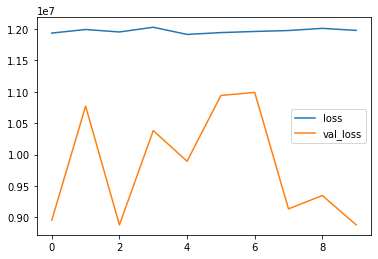

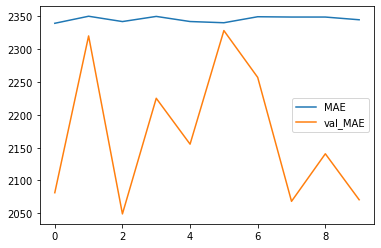

In [22]:
history.history
plt.plot(history.history["loss"],label = "loss")
plt.plot(history.history["val_loss"],label = "val_loss")
plt.legend()
plt.show()
plt.close()


history.history
plt.plot(history.history["mean_absolute_error"],label = "MAE")
plt.plot(history.history["val_mean_absolute_error"],label = "val_MAE")
plt.legend()
plt.show()
plt.close()

In [19]:
y_pred = model.predict(X_test)

In [14]:

list_entso = ["predicted_System total load in MAW", "predicted_Wind Offshore in MAW", "predicted_Wind Onshore in MAW",  "predicted_Solar in MAW"]
_, _, _, _, _, y_entso = train_val_test_split(df, list_entso, 90, 90)
y_entso_e = y_entso.iloc[:,[0,1,2,3]].to_numpy()

The shape of the data set is: (145559, 3702)

--------------------------------------------
The shape of the train set is: (128279, 3697)
The shape of the target variable is: (128279, 4)
--------------------------------------------

--------------------------------------------
The shape of the validation set is: (8640, 3697)
The shape of the target variable for the validation set is: (8640, 4)
--------------------------------------------

--------------------------------------------
The shape of the test set is: (8640, 3697)
The shape of the target variable for the test set is: (8640, 5)
--------------------------------------------


In [20]:
list_names = ["Load","Wind Offshore", "Wind Onshore", "Solar"]

for i in range(len(y_pred[0])):
    print("=================================")
    print(f"{list_names[i]}")
    get_model_metrics(y_test.iloc[:,[-1,i]],y_pred[:,i])
    print("=================================")


Load
----------------------------------------------
The overall mean absolute error of the model in MW is: 4737.58
----------------------------------------------
----------------------------------------------
The overall mean absolute scaled error of the model in MW is: 9.0002
Please note: to calculate the MASE, the prediction for the first observation was omitted
----------------------------------------------
Wind Offshore
----------------------------------------------
The overall mean absolute error of the model in MW is: 2798.33
----------------------------------------------
----------------------------------------------
The overall mean absolute scaled error of the model in MW is: 32.3763
Please note: to calculate the MASE, the prediction for the first observation was omitted
----------------------------------------------
Wind Onshore
----------------------------------------------
The overall mean absolute error of the model in MW is: 1878.88
---------------------------------------

In [21]:
list_names = ["Load","Wind Offshore", "Wind Onshore", "Solar"]

for i in range(len(y_pred[0])):
    print("=================================")
    print(f"{list_names[i]}")
    get_model_metrics(y_test.iloc[:,[-1,i]],y_entso_e[:,i])
    print("=================================")


Load
----------------------------------------------
The overall mean absolute error of the model in MW is: 1399.12
----------------------------------------------
----------------------------------------------
The overall mean absolute scaled error of the model in MW is: 2.6583
Please note: to calculate the MASE, the prediction for the first observation was omitted
----------------------------------------------
Wind Offshore
----------------------------------------------
The overall mean absolute error of the model in MW is: 463.8
----------------------------------------------
----------------------------------------------
The overall mean absolute scaled error of the model in MW is: 5.3665
Please note: to calculate the MASE, the prediction for the first observation was omitted
----------------------------------------------
Wind Onshore
----------------------------------------------
The overall mean absolute error of the model in MW is: 917.72
-------------------------------------------

In [17]:
list_names = ["Load","Wind Offshore", "Wind Onshore", "Solar"]

for i in range(len(y_pred[0])):
    print("=================================")
    print(f"{list_names[i]}")
    get_model_metrics(y_test.iloc[1:,[-1,i]],y_test.iloc[:-1,i])
    print("=================================")

Load
----------------------------------------------
The overall mean absolute error of the model in MW is: 526.37
----------------------------------------------
----------------------------------------------
The overall mean absolute scaled error of the model in MW is: 1.0
Please note: to calculate the MASE, the prediction for the first observation was omitted
----------------------------------------------
Wind Offshore
----------------------------------------------
The overall mean absolute error of the model in MW is: 86.42
----------------------------------------------
----------------------------------------------
The overall mean absolute scaled error of the model in MW is: 1.0
Please note: to calculate the MASE, the prediction for the first observation was omitted
----------------------------------------------
Wind Onshore
----------------------------------------------
The overall mean absolute error of the model in MW is: 200.27
----------------------------------------------
---